In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing

C:\Users\User\Anaconda3\envs\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


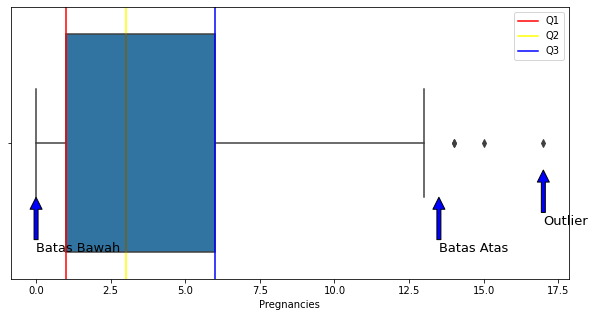

In [6]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Pregnancies'])
plt.axvline(data['Pregnancies'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Pregnancies'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Pregnancies'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Pregnancies'].describe()['max'],0.1), xytext = (data['Pregnancies'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = data['Pregnancies'].describe()['75%'] - data['Pregnancies'].describe()['25%']
plt.annotate('Batas Atas', (data['Pregnancies'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Pregnancies'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (data['Pregnancies'].describe()['min'], 0.2), 
             xytext = (data['Pregnancies'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

In [7]:
#List Data Outlier dalam Pandas
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]
detect_outliers(data,'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [8]:
# REMOVE OUTLIER
Q1 = data['Pregnancies'].describe()['25%']
Q3 = data['Pregnancies'].describe()['75%']
IQR = Q3-Q1
outlier_pregnancies = data[data['Pregnancies'] <= Q3+1.5*IQR]

In [14]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
data_outlier = data

In [17]:
data_outlier['Glucose'].fillna(data_outlier['Glucose'].mean(), inplace = True)
data_outlier['BloodPressure'].fillna(data_outlier['BloodPressure'].mean(), inplace = True)
data_outlier['SkinThickness'].fillna(data_outlier['SkinThickness'].mean(), inplace = True)
data_outlier['Insulin'].fillna(data_outlier['Insulin'].mean(), inplace = True)
data_outlier['BMI'].fillna(data_outlier['BMI'].mean(), inplace = True)
data_outlier.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
scaler = StandardScaler()
scaler.fit(X = data_outlier.drop('Outcome', axis = 1))
X = scaler.transform(X = data_outlier.drop('Outcome', axis = 1))
data_scaler = pd.DataFrame(X, columns=data_outlier.columns[:-1])
data_scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
# FS: RFE

In [19]:
y = data_outlier['Outcome']
X_train, X_test, y_train, y_test = train_test_split(data_scaler, y, test_size = 0.1, random_state = 101)

In [20]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(data_scaler, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [21]:
data_clean = data_scaler
target = y
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


Text(0.5, 1.0, 'Error Rate vs K-value')

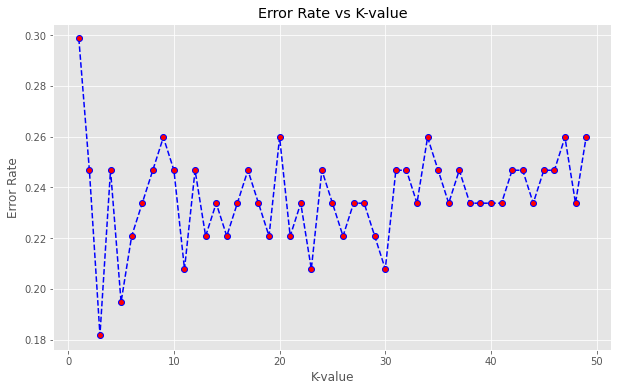

In [23]:
err_rates = []
for idx in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,50), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [24]:
new_KNN = KNeighborsClassifier(n_neighbors = 21)
new_KNN.fit(X_train, y_train)
y_predict = new_KNN.predict(X_test)

In [25]:
accuracy= accuracy_score(y_test, y_predict)
print("Akurasi : ",accuracy)

Akurasi :  0.7792207792207793


In [26]:
print(confusion_matrix(y_test,y_predict))

[[46  7]
 [10 14]]


In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.67      0.58      0.62        24

    accuracy                           0.78        77
   macro avg       0.74      0.73      0.73        77
weighted avg       0.77      0.78      0.77        77

